In [ ]:
## Importing the necessary libraries along with the standard import
import numpy as np 
import pandas as pd 
# regular expression is a package which helps to search certain text (particular text) or string in the data as well do some
# manipulation to the strings or the data
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [ ]:
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [ ]:
yelp_reviews = pd.read_csv('yelp.csv')

In [ ]:
yelp_reviews.shape

(10000, 10)

In [ ]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
print(yelp_reviews['stars'].nunique())
print(yelp_reviews['stars'].value_counts().sort_values())

5
1     749
2     927
3    1461
5    3337
4    3526
Name: stars, dtype: int64


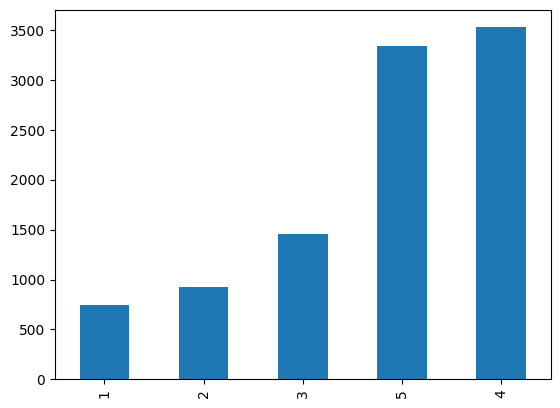

In [ ]:
yelp_reviews['stars'].value_counts().sort_values().plot(kind='bar')
plt.show()

In [ ]:
((yelp_reviews.isnull() | yelp_reviews.isna()).sum() * 100 / yelp_reviews.index.size).round(2)

business_id    0.0
date           0.0
review_id      0.0
stars          0.0
text           0.0
type           0.0
user_id        0.0
cool           0.0
useful         0.0
funny          0.0
dtype: float64

**BASIC PRE PROCESSING**

**Number of Words**

In [ ]:
yelp_reviews['totalwords'] = [len(x.split()) for x in yelp_reviews['text'].tolist()]
yelp_reviews[['text','totalwords','stars']].head()

text  totalwords  stars
0  My wife took me here on my birthday for breakf...         155      5
1  I have no idea why some people give bad review...         257      5
2  love the gyro plate. Rice is so good and I als...          16      4
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...          76      5
4  General Manager Scott Petello is a good egg!!!...          86      5

**Number of Stop Words**

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
yelp_reviews['stopwords'] = yelp_reviews['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
yelp_reviews[['text','stopwords']].head()

text  stopwords
0  My wife took me here on my birthday for breakf...         59
1  I have no idea why some people give bad review...        114
2  love the gyro plate. Rice is so good and I als...          5
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...         28
4  General Manager Scott Petello is a good egg!!!...         40

**Check what these Stop Words**

In [ ]:
yelp_reviews['text_stopwords']= yelp_reviews['text'].apply(lambda x: [x for x in x.split() if x in stop])

yelp_reviews['text_stopwords']

0       [me, here, on, my, for, and, it, was, was, whi...
1       [have, no, why, some, about, this, to, you, ca...
2                               [the, is, so, and, their]
3       [and, very, and, by, a, of, a, and, a, with, a...
4       [is, a, to, into, but, me, you, if, you, have,...
                              ...                        
9995    [here, my, the, and, both, there, was, too, we...
9996    [be, of, on, and, on, about, this, that, but, ...
9997    [and, for, and, after, am, that, has, some, of...
9998    [just, to, so, me, and, a, of, him, here, to, ...
9999    [all, has, some, and, is, at, the, of, my, the...
Name: text_stopwords, Length: 10000, dtype: object

In [ ]:
yelp_reviews['text'] = yelp_reviews['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
yelp_reviews['text'].head()

0    My wife took birthday breakfast excellent. The...
1    I idea people give bad reviews place. It goes ...
2    love gyro plate. Rice good I also dig candy se...
3    Rosie, Dakota, I LOVE Chaparral Dog Park!!! It...
4    General Manager Scott Petello good egg!!! Not ...
Name: text, dtype: object

**Numerics in the text**

In [ ]:
yelp_reviews['Numeric']= yelp_reviews['text'].apply(lambda x:len(re.findall(r'[0-9]',x)))
yelp_reviews[['text','Numeric','stars']].head()

text  Numeric  stars
0  My wife took birthday breakfast excellent. The...        1      5
1  I idea people give bad reviews place. It goes ...       14      5
2  love gyro plate. Rice good I also dig candy se...        0      4
3  Rosie, Dakota, I LOVE Chaparral Dog Park!!! It...        0      5
4  General Manager Scott Petello good egg!!! Not ...        0      5

**Remove Special characters, Punctuations**

In [ ]:
yelp_reviews['text']= yelp_reviews['text'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.


<ipython-input-98-c1ff5fffaaa4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  yelp_reviews['text']= yelp_reviews['text'].str.replace('[^\w\s]','')


**Convert all of words into lower case letters**

In [ ]:
yelp_reviews['text'] = yelp_reviews['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
yelp_reviews['text'].head()

0    my wife took birthday breakfast excellent the ...
1    i idea people give bad reviews place it goes s...
2    love gyro plate rice good i also dig candy sel...
3    rosie dakota i love chaparral dog park its con...
4    general manager scott petello good egg not go ...
Name: text, dtype: object

**Common Words used- Analyse the occurance of words**

In [ ]:
common_words = pd.Series(' '.join(yelp_reviews['text']).split()).value_counts()[:50]
common_words

i             34707
the           11798
good           6713
place          6634
food           6079
it             5251
great          5066
like           4970
one            4024
get            3801
time           3452
go             3446
really         3348
we             3262
service        3109
would          3063
back           2861
this           2660
they           2601
also           2507
im             2262
love           2239
little         2215
nice           2207
well           2173
my             2145
ive            2109
always         2013
even           1996
best           1939
us             1906
there          1877
got            1828
pretty         1804
much           1749
chicken        1717
try            1709
ordered        1703
restaurant     1690
menu           1652
people         1643
first          1621
know           1596
order          1574
and            1572
think          1546
could          1539
its            1538
bar            1536
never          1530


**Remove the words that are not required or meaningless**

In [ ]:
word_removal=['i','the','get','it','dont','this','im','ive','didnt','my']

In [ ]:
yelp_reviews['text'] = yelp_reviews['text'].apply(lambda x: " ".join(x for x in x.split() if x not in word_removal))
yelp_reviews['text'].head()

0    wife took birthday breakfast excellent weather...
1    idea people give bad reviews place goes show y...
2    love gyro plate rice good also dig candy selec...
3    rosie dakota love chaparral dog park its conve...
4    general manager scott petello good egg not go ...
Name: text, dtype: object

**Words that are not used frequently**

In [ ]:
Not_frequent = pd.Series(' '.join(yelp_reviews['text']).split()).value_counts()[-50:]
Not_frequent

chatnot                         1
40000                           1
ohmygod                         1
rooter                          1
roto                            1
sightings                       1
worldrenowned                   1
snort                           1
clucterfuck                     1
ninteen                         1
wurst                           1
krakauer                        1
dearth                          1
broiledboiled                   1
adversity                       1
leavei                          1
newsthe                         1
tableau                         1
soonand                         1
wetall                          1
saucenot                        1
oneim                           1
shifter                         1
biteand                         1
bitenot                         1
possiblei                       1
insteadmy                       1
slotted                         1
brownorange                     1
islandssmall  

**Remove these words**

In [ ]:
yelp_reviews['text'] = yelp_reviews['text'].apply(lambda x: " ".join(x for x in x.split() if x not in Not_frequent))
yelp_reviews['text'].head()

0    wife took birthday breakfast excellent weather...
1    idea people give bad reviews place goes show y...
2    love gyro plate rice good also dig candy selec...
3    rosie dakota love chaparral dog park its conve...
4    general manager scott petello good egg not go ...
Name: text, dtype: object

**Stemming**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizerword = WordNetLemmatizer()
yelp_reviews['text'][:5].apply(lambda x: " ".join([lemmatizerword.lemmatize(i) for i in x.split()]))

0    wife took birthday breakfast excellent weather...
1    idea people give bad review place go show you ...
2    love gyro plate rice good also dig candy selec...
3    rosie dakota love chaparral dog park it conven...
4    general manager scott petello good egg not go ...
Name: text, dtype: object

**Sentiment Analysis**

In [ ]:
yelp_reviews.stars.value_counts().plot(kind='pie', 
                                       autopct='%1.0f%%', 
                                       colors=["red","yellow","green","purple","blue"])

<Axes: ylabel='stars'>

**Lets see what this words are in group 4 and 5 using word cloud**

In [ ]:
from wordcloud import WordCloud,STOPWORDS

positives=yelp_reviews[(yelp_reviews['stars']==4) |(yelp_reviews['stars']==5 )]
p_words = ' '.join(positives['text'])
p_words

'wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure our waitress excellent food arrived quickly semibusy saturday morning looked like place fills pretty quickly earlier better do favor bloody mary phenomenal simply best ever had pretty sure use ingredients garden blend fresh order amazing while everything menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious came 2 pieces griddled bread amazing absolutely made meal complete best toast ever had anyway cant wait go back idea people give bad reviews place goes show you please everyone they probably griping something faultthere many people like that in case friend arrived 550 pm past sunday pretty crowded thought sunday evening thought would wait forever seat said well seated girl comes back seating someone else we seated 552 waiter came got drink orders everyone pleasant host seated us waiter server prices good well we placed orders decided wanted

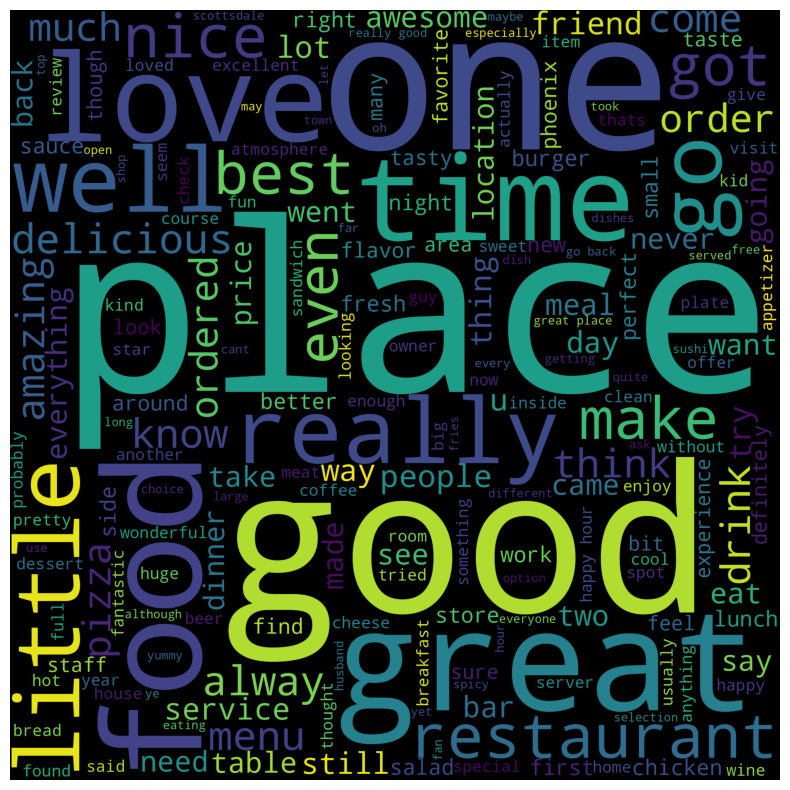

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=2000
                     ).generate(p_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Neutral and Negative Sentiments**

In [ ]:

neut_neg=yelp_reviews[(yelp_reviews['stars']==1) |(yelp_reviews['stars']==2)]
n_words = ' '.join(neut_neg['text'])
n_words

'was worth 21 salad small pizza absolutely not bad service maybe guys grandma died know want tell really made mad experience we order small pizza salad guys could cared less took sat down we looking around hmm theres sign saying x large pizza large salad 23 wow would nice guy told us that left hungry mad unsatisfied to owner teach employees value upselling telling specials something small affect customers experience negatively and salads severely overpriced wont go back unless desperate u go n check car out if u wanna buy 1 there thats wrong move if u even want car service there u made biggest mistake ur life 1 time asked girlfriend take car oil service guess what they ripped girlfriend lying bad car now if without fixing problem might bring serious accident then said 4 brand new tires timing belt 4 new brake pads u know whys worst all changed 2 months before what trashy dealer that people better go somewhere disgusting had groupon daughter tried out very outdated gaudy 80s style inter

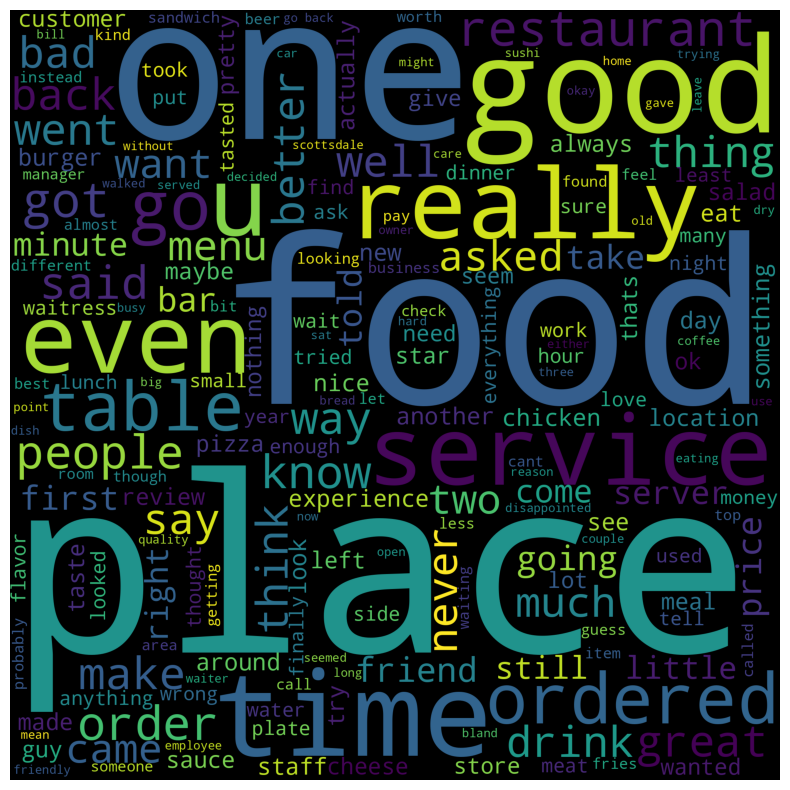

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=2000
                     ).generate(n_words)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   business_id     10000 non-null  object
 1   date            10000 non-null  object
 2   review_id       10000 non-null  object
 3   stars           10000 non-null  int64 
 4   text            10000 non-null  object
 5   type            10000 non-null  object
 6   user_id         10000 non-null  object
 7   cool            10000 non-null  int64 
 8   useful          10000 non-null  int64 
 9   funny           10000 non-null  int64 
 10  totalwords      10000 non-null  int64 
 11  stopwords       10000 non-null  int64 
 12  text_stopwords  10000 non-null  object
 13  Numeric         10000 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.1+ MB


**Lets extact the columns required for analysis**

In [ ]:
yelp_sentiments = yelp_reviews[['text','stars']]

In [ ]:
X = yelp_sentiments.text
y = yelp_sentiments.stars

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                y, 
                                                random_state=0)

In [ ]:
Xtrain.shape

(7500,)

In [ ]:
Xtest.shape

(2500,)

**Lets Create DTM (Document Term Matrix)**

In [ ]:
vector = CountVectorizer(stop_words='english',min_df=9, max_df=0.85)

In [ ]:
# here we are learning all the unique words for the reviews collected.
vector.fit(Xtrain)

CountVectorizer(max_df=0.85, min_df=9, stop_words='english')

In [ ]:
vector.get_feature_names_out()

array(['10', '100', '1000', ..., 'zone', 'zoo', 'zucchini'], dtype=object)

In [ ]:
len(vector.get_feature_names_out())

4813

In [ ]:
# transform the words into Document Term Matrix -DTM
DTM_train = vector.transform(Xtrain)

In [ ]:
DTM_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
features_train = pd.DataFrame(DTM_train.toarray(),columns=vector.get_feature_names_out())
features_train

10  100  1000  101  1012  1015  10pm  11  110  1100  ...  yum  yummy  \
0      0    0     0    0     0     0     0   0    0     0  ...    1      0   
1      0    0     0    0     0     0     0   0    0     0  ...    0      0   
2      0    0     0    0     0     0     0   1    0     0  ...    0      0   
3      0    0     0    0     0     0     0   0    0     0  ...    0      0   
4      0    0     0    0     0     0     0   0    0     0  ...    0      0   
...   ..  ...   ...  ...   ...   ...   ...  ..  ...   ...  ...  ...    ...   
7495   0    0     0    0     0     0     0   0    0     0  ...    0      0   
7496   0    0     0    0     0     0     0   0    0     0  ...    0      0   
7497   0    0     0    0     0     0     0   0    0     0  ...    0      0   
7498   0    0     0    0     0     0     0   0    0     0  ...    0      0   
7499   0    0     0    0     0     0     0   0    0     0  ...    0      0   

      yup  zero  zinburger  zinc  zipps  zone  zoo  zucchini  
0       0     0          0     0      0     0    0         0  
1       0     0          0     0      0     0    0         0  
2       0     0          0     0      0     0    0         0  
3       0     0          0     0      0     0    0         0  
4       0     0          0     0      0     0    0         0  
...   ...   ...        ...   ...    ...   ...  ...       ...  
7495    0     0          0     0      0     0    0         0  
7496    0     0          0     0      0     0    0         0  
7497    0     0          0     0      0     0    0         0  
7498    0     0          0     0      0     0    0         0  
7499    0     0          0     0      0     0    0         0  

[7500 rows x 4813 columns]

**Transform the Test Data using the learning of Training Data**

In [ ]:
DTM_test = vector.transform(Xtest)

In [ ]:
DTM_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
features_test = pd.DataFrame(DTM_test.toarray(),columns=vector.get_feature_names_out())
features_test

10  100  1000  101  1012  1015  10pm  11  110  1100  ...  yum  yummy  \
0      0    0     0    0     0     0     0   0    0     0  ...    0      1   
1      0    0     0    0     0     0     0   0    0     0  ...    0      0   
2      0    0     0    0     0     0     0   0    0     0  ...    0      0   
3      0    0     0    0     0     0     0   0    0     0  ...    0      0   
4      0    0     0    0     0     0     0   0    0     0  ...    1      0   
...   ..  ...   ...  ...   ...   ...   ...  ..  ...   ...  ...  ...    ...   
2495   0    0     0    0     0     0     0   0    0     0  ...    0      0   
2496   0    0     0    0     0     0     0   0    0     0  ...    0      0   
2497   0    0     0    0     0     0     0   0    0     0  ...    0      0   
2498   0    0     0    0     0     0     0   0    0     0  ...    0      0   
2499   0    0     0    0     0     0     0   0    0     0  ...    0      1   

      yup  zero  zinburger  zinc  zipps  zone  zoo  zucchini  
0       0     0          0     0      0     0    0         0  
1       0     0          0     0      0     0    0         0  
2       0     0          0     0      0     0    0         0  
3       0     0          0     0      0     0    0         0  
4       0     0          0     0      0     0    0         1  
...   ...   ...        ...   ...    ...   ...  ...       ...  
2495    0     0          0     0      0     0    0         0  
2496    0     0          0     0      0     0    0         0  
2497    0     0          0     0      0     0    0         0  
2498    0     1          0     0      0     0    0         0  
2499    0     0          0     0      0     0    0         0  

[2500 rows x 4813 columns]

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=150, random_state=0)
RF_model.fit(DTM_train, ytrain)

RandomForestClassifier(n_estimators=150, random_state=0)

In [ ]:
from sklearn import metrics
ytest_predict = RF_model.predict(DTM_test)
model_score =RF_model.score(DTM_test, ytest)
print(model_score)


print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.472
[[ 62   7  13  73  33]
 [ 14   9  23 139  35]
 [  5   1  15 280  55]
 [ 11   1  10 587 273]
 [  9   0   1 337 507]]
              precision    recall  f1-score   support

           1       0.61      0.33      0.43       188
           2       0.50      0.04      0.08       220
           3       0.24      0.04      0.07       356
           4       0.41      0.67      0.51       882
           5       0.56      0.59      0.58       854

    accuracy                           0.47      2500
   macro avg       0.47      0.33      0.33      2500
weighted avg       0.46      0.47      0.43      2500



In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
nb_model = MultinomialNB()
nb_model.fit(DTM_train, ytrain)

MultinomialNB()

In [ ]:
ytest_predict = nb_model.predict(DTM_test)
model_score =nb_model.score(DTM_test, ytest)
print(model_score)


print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.51
[[102  48  19   9  10]
 [ 38  62  66  41  13]
 [ 15  44 111 144  42]
 [ 21  31  99 486 245]
 [ 26  13  32 269 514]]
              precision    recall  f1-score   support

           1       0.50      0.54      0.52       188
           2       0.31      0.28      0.30       220
           3       0.34      0.31      0.33       356
           4       0.51      0.55      0.53       882
           5       0.62      0.60      0.61       854

    accuracy                           0.51      2500
   macro avg       0.46      0.46      0.46      2500
weighted avg       0.51      0.51      0.51      2500



**n Gram **

In [ ]:
vector_gram = CountVectorizer(ngram_range =(1,2), stop_words='english',min_df=9, max_df=0.85)
vector_gram.fit(Xtrain)

CountVectorizer(max_df=0.85, min_df=9, ngram_range=(1, 2), stop_words='english')

In [ ]:
vector_gram.get_feature_names_out()

array(['10', '10 bucks', '10 minutes', ..., 'zone', 'zoo', 'zucchini'],
      dtype=object)

In [ ]:
DTM_train = vector_gram.transform(Xtrain)
DTM_test = vector_gram.transform(Xtest)

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(DTM_train, ytrain)

MultinomialNB()

In [ ]:
DTM_train.shape

(7500, 7084)

In [ ]:
DTM_test.shape

(2500, 7084)

In [ ]:
ytest_predict = nb_model.predict(DTM_test)
model_score =nb_model.score(DTM_test, ytest)
print(model_score)


print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.5176
[[106  50  16  10   6]
 [ 35  66  69  41   9]
 [ 16  45 119 128  48]
 [ 23  27  99 475 258]
 [ 25  11  28 262 528]]
              precision    recall  f1-score   support

           1       0.52      0.56      0.54       188
           2       0.33      0.30      0.32       220
           3       0.36      0.33      0.35       356
           4       0.52      0.54      0.53       882
           5       0.62      0.62      0.62       854

    accuracy                           0.52      2500
   macro avg       0.47      0.47      0.47      2500
weighted avg       0.51      0.52      0.52      2500



1. Model is predicting well for 4 star and 5 star.
2. Model is not predicting well for 2 star and 3 star.
3. There is less amount of data to learn from 2 and 3 star.

**Lets create 2 groups - Positive and Negative Reviews**

In [ ]:
yelp_reviews.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'totalwords', 'stopwords', 'text_stopwords',
       'Numeric'],
      dtype='object')

In [ ]:
def review(stars):
    
    if stars==1:
            
      return "Negative"
    
    elif stars==2:
      return "Negative"

    elif stars==3:
      return "Negative"

  
    else: return "Positive"

In [ ]:
yelp_reviews["Sentiment"] = yelp_reviews['stars'].apply(review)

yelp_reviews.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  wife took birthday breakfast excellent weather...  review   
1  idea people give bad reviews place goes show y...  review   
2  love gyro plate rice good also dig candy selec...  review   
3  rosie dakota love chaparral dog park its conve...  review   
4  general manager scott petello good egg not go ...  review   

                  user_id  cool  useful  funny  totalwords  stopwords  \
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0         155         59   
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0         257        114   
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0          16          5   
3  uZetl9T0NcROGOyFfughhg     1       2      0          76         28   
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0          86         40   

                                      text_stopwords  Numeric Sentiment  
0  [me, here, on, my, for, and, it, was, was, whi...        1  Positive  
1  [have, no, why, some, about, this, to, you, ca...       14  Positive  
2                          [the, is, so, and, their]        0  Positive  
3  [and, very, and, by, a, of, a, and, a, with, a...        0  Positive  
4  [is, a, to, into, but, me, you, if, you, have,...        0  Positive

In [ ]:
yelp_reviews["Sentiment"].value_counts()

Positive    6863
Negative    3137
Name: Sentiment, dtype: int64

In [ ]:
yelp_reviews.Sentiment.value_counts().plot(kind='pie', 
                                       autopct='%1.0f%%', 
                                       colors=["Green","Red"])

<Axes: ylabel='Sentiment'>

In [ ]:
yelp_sentiments = yelp_reviews[['text','Sentiment']]

In [ ]:
X = yelp_sentiments.text
y = yelp_sentiments.Sentiment

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, 
                                                y, 
                                                random_state=0)

In [ ]:
vector_2c = CountVectorizer(stop_words='english',min_df=9, max_df=0.85)

vector_2c.fit(Xtrain)
DTM_train = vector_2c.transform(Xtrain)
DTM_test = vector_2c.transform(Xtest)

**Random Forest Model**

In [ ]:
RF_model = RandomForestClassifier(n_estimators=150, random_state=0)
RF_model.fit(DTM_train, ytrain)

RandomForestClassifier(n_estimators=150, random_state=0)

In [ ]:
ytest_predict = RF_model.predict(DTM_test)
model_score =RF_model.score(DTM_test, ytest)
print(model_score)


print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.81
[[ 403  361]
 [ 114 1622]]
              precision    recall  f1-score   support

    Negative       0.78      0.53      0.63       764
    Positive       0.82      0.93      0.87      1736

    accuracy                           0.81      2500
   macro avg       0.80      0.73      0.75      2500
weighted avg       0.81      0.81      0.80      2500



**Linear Discriminant Analysis- LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(DTM_train.toarray(), ytrain)

LinearDiscriminantAnalysis()

In [ ]:
## Performance Matrix on test data set
ytest_predict = LDA_model.predict(DTM_test)
model_score = LDA_model.score(DTM_test, ytest)
print(model_score)



print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.7076
[[ 438  326]
 [ 405 1331]]
              precision    recall  f1-score   support

    Negative       0.52      0.57      0.55       764
    Positive       0.80      0.77      0.78      1736

    accuracy                           0.71      2500
   macro avg       0.66      0.67      0.66      2500
weighted avg       0.72      0.71      0.71      2500



**Naive Bayes**

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(DTM_train, ytrain)

MultinomialNB()

In [ ]:
ytest_predict = nb_model.predict(DTM_test)
model_score =nb_model.score(DTM_test, ytest)
print(model_score)


print(metrics.confusion_matrix(ytest, ytest_predict))
print(metrics.classification_report(ytest, ytest_predict))

0.8216
[[ 529  235]
 [ 211 1525]]
              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70       764
    Positive       0.87      0.88      0.87      1736

    accuracy                           0.82      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.82      0.82      0.82      2500

